Buscar a ação da Apple e recriar o gráfico de Candlestick usando a biblioteca MPLFinance.

In [ ]:
!pip install mplfinance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf  # API qu conecta várias bases de dados financeiros
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
dados = yf.download('AAPL34.SA', start = '2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,34.610001,35.000000,33.830002,35.000000,34.788429,106390
2023-01-03,35.099998,35.330002,33.680000,34.060001,33.854115,478443
2023-01-04,34.150002,35.070000,34.040001,34.080002,33.873989,308361
2023-01-05,34.220001,34.459999,33.330002,33.330002,33.128529,441128
2023-01-06,33.330002,34.090000,33.060001,33.630001,33.426708,631468
...,...,...,...,...,...,...
2023-12-21,47.900002,47.959999,47.299999,47.349998,47.307720,80583
2023-12-22,47.349998,47.500000,46.889999,47.000000,46.958035,65079
2023-12-26,47.000000,47.060001,46.509998,46.509998,46.468472,71234


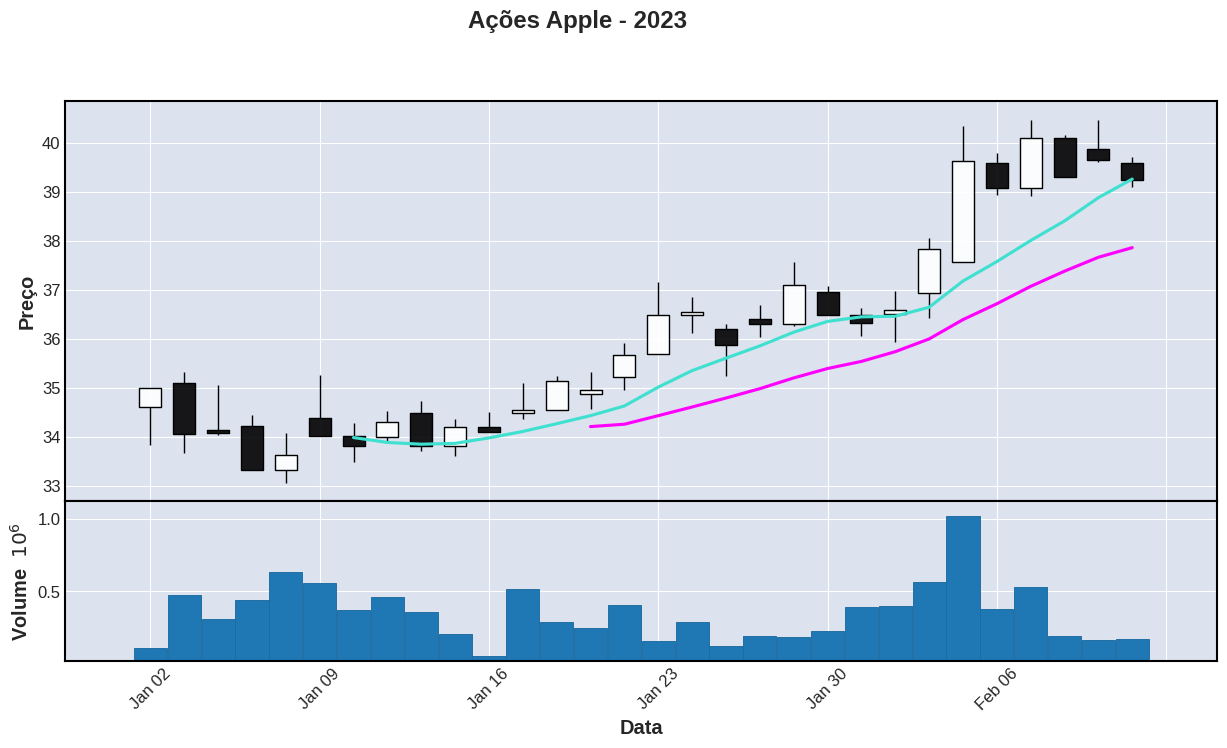

In [ ]:

mpf.plot(dados.head(30), type='candle', ylabel= 'Preço', xlabel = 'Data', figsize = (16,8), volume=True, mav=(7,14),  title= 'Ações Apple - 2023')

In [ ]:
# com tratamento e plotly
dados.columns
dados.columns = ['Abertura','Maximo', 'Minimo','Fechamento','Fech_ajust','Volume']
dados = dados.rename_axis('Data')
df = dados.head(60).copy()
df['Data'] = df.index # cria uma coluna da coluna datas mas formata
df['Data'] = df['Data'].apply(mdates.date2num) #transforma as datas em números. Apply é uma função que aplioca uma função linha linha

In [ ]:
df

,Abertura,Maximo,Minimo,Fechamento,Fech_ajust,Volume,Data
Data,,,,,,,
2023-01-02,34.610001,35.000000,33.830002,35.000000,34.788429,106390,19359.0
2023-01-03,35.099998,35.330002,33.680000,34.060001,33.854115,478443,19360.0
2023-01-04,34.150002,35.070000,34.040001,34.080002,33.873989,308361,19361.0
2023-01-05,34.220001,34.459999,33.330002,33.330002,33.128529,441128,19362.0
2023-01-06,33.330002,34.090000,33.060001,33.630001,33.426708,631468,19363.0
2023-01-09,34.400002,35.270000,34.029999,34.029999,33.824287,560017,19366.0
2023-01-10,34.029999,34.279999,33.500000,33.810001,33.605625,373035,19367.0
2023-01-11,34.000000,34.540001,33.880001,34.299999,34.092663,462663,19368.0
2023-01-12,34.500000,34.740002,33.720001,33.810001,33.605625,360036,19369.0


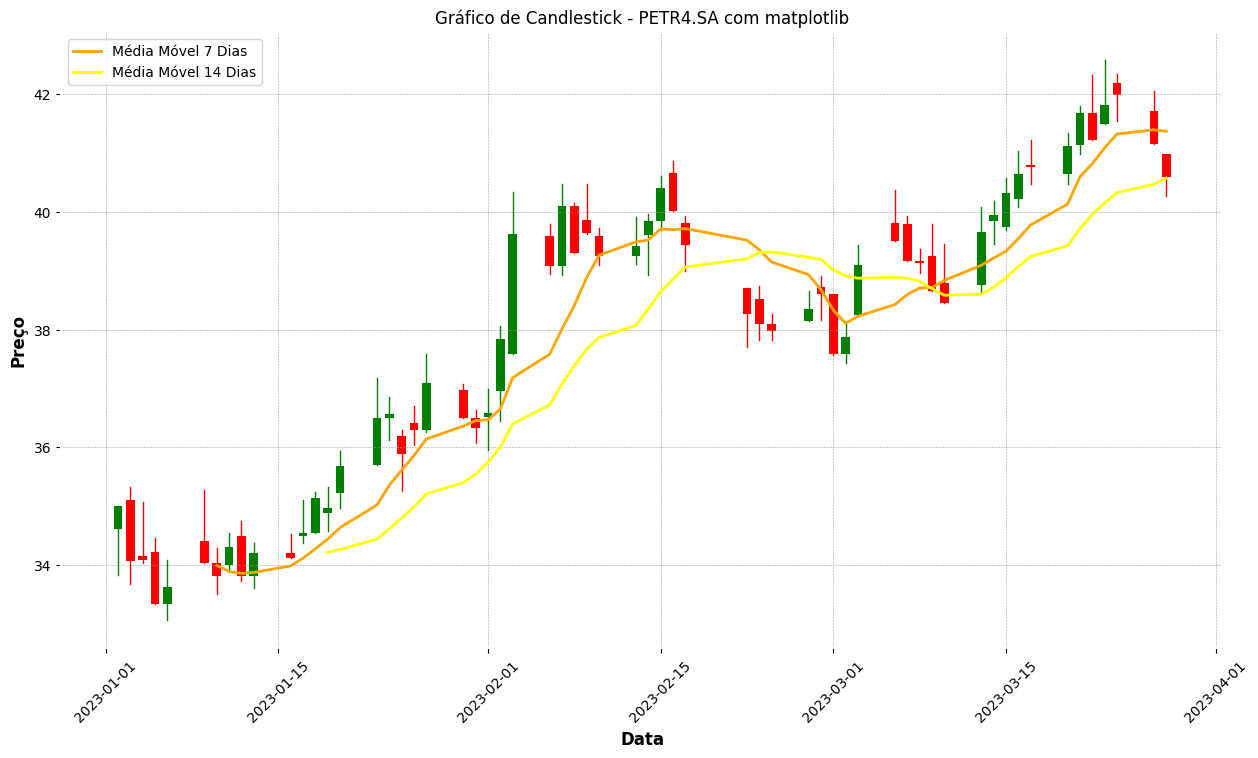

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):     # len função que diz o tamanho do dataframe
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]: # varrear as linhas i da coluna 'fechamento' e 'abertura'
        color = 'green'
    else:
        color = 'red'

    # Para cada cor vamos fazer pintar o candle e continuar o código de construção
    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,    # color definido no laço i do for
            linewidth=1)   # linewidth tamanho da linha

# Execute aqui para entender

    # Método para add objetos com add_patch
    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

# Média móvel
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# execute aqui para ver a ideia

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

Interativo

In [ ]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
# Vantagem: A biblioteca tem um módulo para candlestick (não precisamos desenhar retângulo com matplotlib)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()